In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
     

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)
     

In [2]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.841496,0.757841,0.897889,-1.833259,-0.584526,0
1,1.448114,1.646299,-2.132893,0.030921,-1.423319,0
2,-0.838464,2.412089,-2.524727,2.142786,-0.774394,1
3,-0.203543,0.535709,-3.197857,-0.699800,0.002597,0
4,-2.709455,2.623808,0.170215,-2.975250,-0.152077,0


In [3]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)
     

In [4]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [5]:
# function for combined sampling
import random


def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [6]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_16748\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [7]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_16748\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\Rishikesh\AppData\Local\Temp\ipykernel_16748\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
     

Index(['col1', 'col4', 'target'], dtype='object')
Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col4', 'target'], dtype='object')


In [10]:

df3

,col3,col4,target
52,0.151688,0.125913,1
22,-4.386131,2.627713,1
18,-0.918421,0.340812,0
11,1.772440,0.169386,1
90,-0.686840,1.471916,1
65,1.410049,0.455151,0
33,-1.668760,0.945307,1
1,-2.132893,0.030921,0
69,-0.344688,0.789374,1
29,-2.841651,1.559878,1


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()
     

In [12]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')


DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.36666666666666664, 0.9285714285714286, 'x[1] <= -0.217\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.13333333333333333, 0.7857142857142857, 'x[0] <= 1.416\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.25, 0.8571428571428572, 'True  '),
 Text(0.06666666666666667, 0.6428571428571429, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.2, 0.6428571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.7857142857142857, 'x[0] <= 0.636\ngini = 0.32\nsamples = 30\nvalue = [6, 24]'),
 Text(0.4833333333333333, 0.8571428571428572, '  False'),
 Text(0.3333333333333333, 0.6428571428571429, 'x[0] <= -1.092\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.26666666666666666, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.5, 'x[0] <= -0.188\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4666666666666667, 0.35714285714285715, 'x[1] <= 0.189\ngin

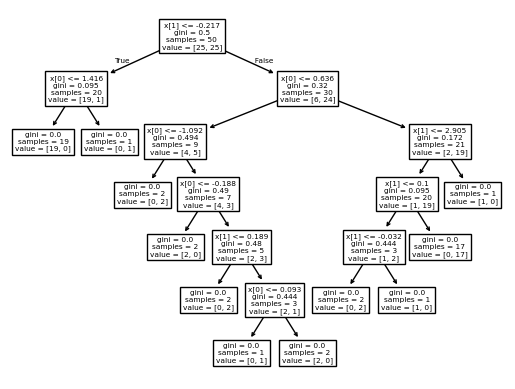

In [15]:
plot_tree(clf1)
     

[Text(0.5, 0.9444444444444444, 'x[1] <= 0.669\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.2, 0.8333333333333334, 'x[1] <= -2.1\ngini = 0.375\nsamples = 32\nvalue = [24, 8]'),
 Text(0.35, 0.8888888888888888, 'True  '),
 Text(0.1, 0.7222222222222222, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.3, 0.7222222222222222, 'x[1] <= -1.883\ngini = 0.463\nsamples = 22\nvalue = [14, 8]'),
 Text(0.2, 0.6111111111111112, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4, 0.6111111111111112, 'x[1] <= -0.939\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.5, 'x[1] <= -0.878\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.4, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.3888888888888889, 'x[0] <= -1.655\ngini = 0.444\nsamples = 9\nvalue = [6, 3]'),
 Text(0.5, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.2777777777777778, 'x[1] <= -0.308\

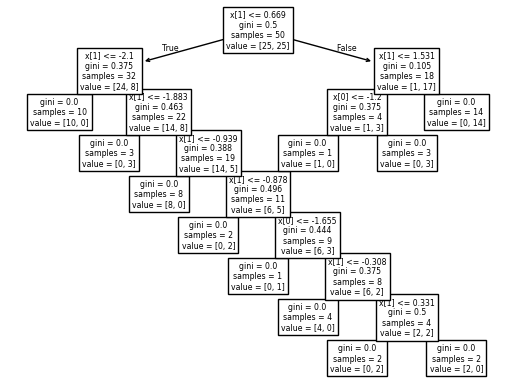

In [16]:
plot_tree(clf2)

[Text(0.45454545454545453, 0.9166666666666666, 'x[1] <= -0.528\ngini = 0.449\nsamples = 50\nvalue = [17, 33]'),
 Text(0.36363636363636365, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.40909090909090906, 0.8333333333333333, 'True  '),
 Text(0.5454545454545454, 0.75, 'x[1] <= 0.53\ngini = 0.193\nsamples = 37\nvalue = [4, 33]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.36363636363636365, 0.5833333333333334, 'x[1] <= 0.339\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(0.2727272727272727, 0.4166666666666667, 'x[0] <= -1.422\ngini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.18181818181818182, 0.25, 'x[1] <= 0.184\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.45454545454545453, 0.41666666666666

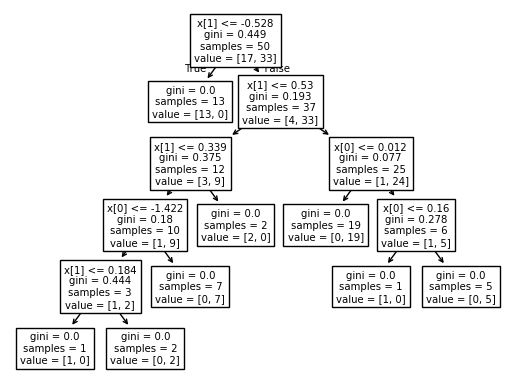

In [17]:
plot_tree(clf3)
     

In [18]:

clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [19]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [20]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))
     

C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
6,-2.092494,1.366774,-2.391907,0.624845,-0.926176,1
66,0.936416,1.108597,-1.406260,1.211852,-0.976590,1
45,-2.789363,1.599648,0.708076,-2.151384,-0.054065,0
66,0.936416,1.108597,-1.406260,1.211852,-0.976590,1
76,2.171805,-2.061207,-1.879227,1.640058,-0.863638,1
72,1.719985,1.031945,-1.886940,2.507705,-3.250228,1
46,1.801050,1.626098,-1.082388,2.088595,-1.714043,1
34,2.818658,2.197049,0.369365,1.099519,-1.062024,1
99,-1.706062,3.210623,-1.078256,-2.651903,0.091593,0
22,-1.199507,0.170358,-4.386131,2.627713,-0.639203,1
